# Bayesian Inference: Activity 3
Prof.Valerio Marra

**Renan Alves de Oliveira**

*2019*

4. Given two independent random variables $X$ and $Y$, find the distribution of $Z=X-Y$ and $W=XY$. Suppose now that $X$ and $Y$ are standard normal variables, find and plot the  distributions of $Z$ and $W$.

Let $f_{X}$, $f_{Y}$, $f_{Z}$, and $f_{W}$ be the distributions for $X$, $Y$, $Z$, and $W$ respectivelly. The standard approach to find the distribution function is (note that $\int\Rightarrow\intop_{-\infty}^{+\infty}$):

\begin{eqnarray*}
f_{Z}\left(z\right) & = & \int\mathrm{d}x\mathrm{\mathrm{d}}yf\left(x,y,z\right)=\int\mathrm{d}x\mathrm{d}yf\left(x,y\right)f\left(z|x,y\right)=\int\mathrm{d}x\mathrm{d}yf_{X}\left(x\right)f_{Y}\left(y\right)f\left(z|x,y\right),\\
 & = & \int\mathrm{d}x\mathrm{d}yf_{X}\left(x\right)f_{Y}\left(y\right)\delta\left(z-x+y\right)=\int\mathrm{d}xf_{X}\left(x\right)f_{Y}\left(x-z\right)=\int\mathrm{d}yf_{Y}\left(y\right)f_{X}\left(z+y\right).
\end{eqnarray*}
Now, for $W$:
\begin{eqnarray*}
f_{W}\left(w\right) & = & \int\mathrm{d}x\mathrm{\mathrm{d}}yf\left(x,y,w\right)=\int\mathrm{d}x\mathrm{d}yf\left(x,y\right)f\left(w|x,y\right)=\int\mathrm{d}x\mathrm{d}yf_{X}\left(x\right)f_{Y}\left(y\right)f\left(w|x,y\right),\\
 & = & \int\mathrm{d}x\mathrm{d}yf_{X}\left(x\right)f_{Y}\left(y\right)\delta\left(w-xy\right)=\int\mathrm{d}xf_{X}\left(x\right)f_{Y}\left(\frac{w}{x}\right)\frac{1}{\left|x\right|}=\int\mathrm{d}yf_{Y}\left(y\right)f_{X}\left(\frac{w}{y}\right)\frac{1}{\left|y\right|}.
\end{eqnarray*}

For standard normal variables, $X\sim\mathcal{N}\left(0,1\right)$, and $Y\sim\mathcal{N}\left(0,1\right)$. Since a standard normal distribution is given by: $$f\left(x\right)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^{2}}{2}\right),$$ we have:

\begin{eqnarray*}
f_{Z}\left(z\right) & = & \frac{1}{2\pi}\int\mathrm{d}x\exp\left[-\frac{x^{2}}{2}-\frac{\left(x-z\right)^{2}}{2}\right],\\
 & = & \frac{1}{\sqrt{4\pi}}\exp\left(-\frac{z^{2}}{4}\right).
\end{eqnarray*}

And 
\begin{eqnarray*}
f_{W}\left(w\right) & = & \frac{1}{2\pi}\int\mathrm{d}x\frac{1}{\left|x\right|}\exp\left[-\frac{x^{2}}{2}-\frac{1}{2}\left(\frac{w}{x}\right)^{2}\right],\\
 & = & \frac{1}{\pi}K_{0}\left(|w|\right),
\end{eqnarray*}
where $K_{0}$ is modified Bessel Function of second order, with $\alpha=0$.

In [2]:
# Load some packages:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn
%matplotlib inline

from matplotlib import rc, rcParams
rc('text', usetex='True') 
rcParams.update({'font.size': 22})

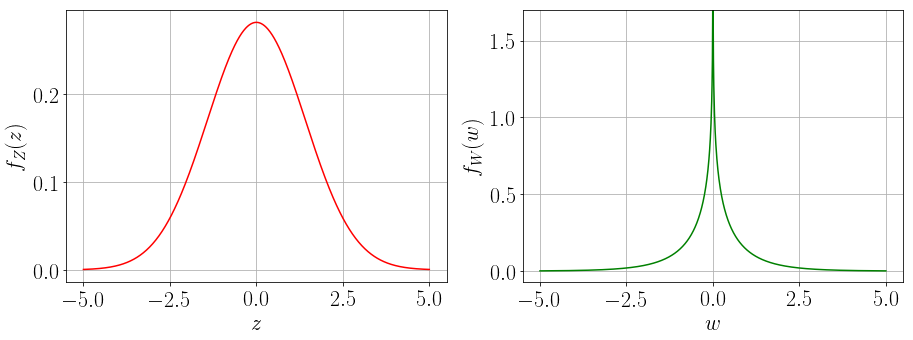

In [3]:
z = np.linspace(-5,5,1000)
w = np.linspace(-5,5,1000)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(z, (1/np.sqrt(4*np.pi))*np.exp(-z**2/4),color='red')
plt.xlabel(r'$z$')
plt.ylabel(r'$f_Z(z)$')
plt.grid()

plt.subplot(122)
plt.plot(z, (1/np.pi)*kn(0, np.abs(w)),color='green')
plt.vlines(0,1.5,2, color='green')
plt.xlabel(r'$w$')
plt.ylabel(r'$f_W(w)$')
plt.ylim(-0.07,1.7)
plt.grid()

plt.show()

5. Prove the CLT using the following methods:
    - Numerically, using a MC;
    - analytically, using moment generating functions or convolutions (if the former does not exist).
Use both $f_{1}\left(z\right)$ of (2.137) and the Cauchy-Lorentz distribution of (2.81). ___Hint___: The Cauchy-Lorentz distribution is ``stable''.

### Numerical Part:

In [4]:
from scipy.stats import cauchy # cauchy module gives the Cauchy-Lorentz distribution
from scipy.stats import chi2 # chi2 module gives the Chi2 distribution

We will create an ensemble of IID. When $N\rightarrow\infty$, a normal distribution is expected.

In [5]:
mcs=10000
ensemble_cauchy = cauchy.rvs(size=(10000,mcs))
ensemble_chi2 = chi2.rvs(1, size=(10000,mcs))

Lets apply this (only for $f_1(z)$) $$\frac{\bar{X}-\mu}{\sigma}\sqrt{n}=Y,$$ where $n=10000$.

In [6]:
Y_cauchy = np.mean(ensemble_cauchy,axis=1)
Y_chi2 = np.sqrt(mcs)*(np.mean(ensemble_chi2,axis=1)-1)/np.sqrt(2)

And for the plots:

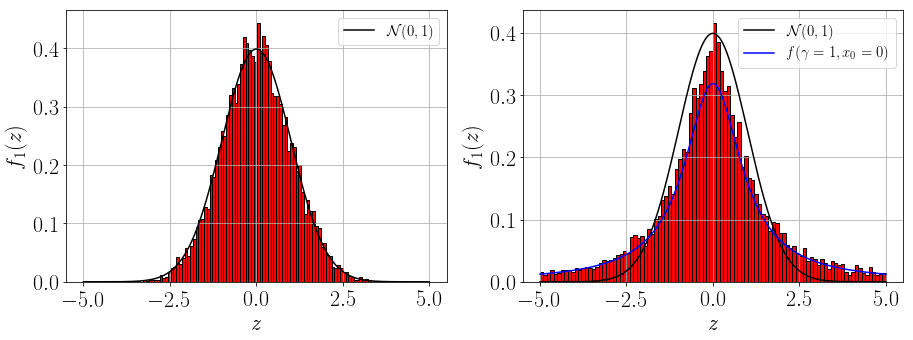

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(Y_chi2, density=1, bins=100, ec='k', color='red')
x = np.linspace(-5,5,1000)
f = (1/np.sqrt(2*np.pi))*np.exp(-(1/2)*x**2)
plt.plot(x,f,'-k', label=r'$\mathcal{N}(0,1)$')
plt.xlabel(r'$z$')
plt.ylabel(r'$f_1(z)$')
plt.legend(fontsize=15)
plt.grid()

plt.subplot(122)
plt.hist(Y_cauchy, density=1, bins=100, range=(-5,5), ec='k', color='red')
x = np.linspace(-5,5,1000)
f = (1/np.sqrt(2*np.pi))*np.exp(-(1/2)*x**2)
plt.plot(x,f,'-k', label=r'$\mathcal{N}(0,1)$')
plt.plot(x,(1/np.pi)*(1/(x**2+1)),'-b', label=r'$f(\gamma=1,x_0=0)$')
plt.xlabel(r'$z$')
plt.ylabel(r'$f_1(z)$')
plt.legend(fontsize=15)
plt.grid()

plt.show()

### Analytical Part:

**Using $\chi^2_1$ distribution:**

Once the Normal distribution is given by $$\begin{aligned}
f\left(x\right) & =\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right],\end{aligned}$$
we can write a new variable $z$, which is $$\begin{aligned}
z & \equiv \left(\frac{x-\mu}{\sigma}\right)^{2},\\
\mathrm{d}z & =  2\left(\frac{x-\mu}{\sigma}\right)\frac{\mathrm{d}x}{\sigma},\\
 & =  \frac{2\sqrt{z}}{\sigma}\mathrm{d}x,\\
\left|\frac{\mathrm{d}x}{\mathrm{d}z}\right| & =  \frac{\sigma}{2\sqrt{z}},\end{aligned}$$
such that $$\begin{aligned}
f\left(z\right) & =  f\left(x\left(z\right)\right)\left|\frac{\mathrm{d}x}{\mathrm{d}z}\right|,\\
 & =  \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{z}{2}\right)\frac{\sigma}{2\sqrt{z}}.\end{aligned}$$
Since $z>0$, and to make this function still normalized, we must
multiply $f\left(z\right)$ by 2 $$\begin{aligned}
f\left(z\right) & =  2\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{z}{2}\right)\frac{1}{2\sqrt{z}},\\
 & =  \frac{1}{\sqrt{2\pi z}}\exp\left(-\frac{z}{2}\right)=f_{1}\left(z\right),\end{aligned}$$
which is the $\chi^{2}$ distribution for $1$ degree of freedom. The mean
and the variance are respectively:
$$\mu=\int zf_{1}\left(z\right)\mathrm{d}z=1,$$ and,
$$\sigma^{2}=\int\left(z-1\right)f_{1}\left(z\right)\mathrm{d}z=2.$$

The central moment generating function is: $$\begin{aligned}
m_{Z-1}\left(t\right) & =  \overline{e^{t\left(Z-1\right)}}=\intop_{0}^{\infty}e^{t\left(z-1\right)}f_{1}\left(z\right)\mathrm{d}z,\\
 & =  \frac{e^{-t}}{\sqrt{2\pi}}\intop_{0}^{\infty}\frac{e^{tz}}{\sqrt{z}}\exp\left(-\frac{z}{2}\right)\mathrm{d}z,\\
 & =  e^{-t}\left(1-2t\right)^{-\frac{1}{2}}.\end{aligned}$$

Lets suppose we have and ensemble of $\chi_{1}^{2}$:
$$Y=\sum_{i=1}^{N}Z_{i},$$ which $Z_{i}\sim f_{1}\left(z\right)$. To
make $Y$ variate an standardized random variate, we must use:
$$\hat{Y}=\frac{\bar{Y}-\mu_{Y}}{\sigma_{Y}},$$ such that:
$$\begin{aligned}
\bar{Y} & =  \frac{1}{N}\sum_{i=1}^{N}Z_{i},\\
\mu_{Y} & =  \frac{1}{N}\sum_{i=1}^{N}\mu_{Z_{i}}=\frac{1}{N}\sum_{i=1}^{N}\mu=\mu,\\
\sigma_{Y}^{2} & =  \frac{1}{N^{2}}\sum_{i=1}^{N}\sigma_{Z_{i}}^{2}=\frac{1}{N^{2}}\sum_{i=1}^{N}\sigma^{2}=\frac{\sigma^{2}}{N},\end{aligned}$$
leading to $$\begin{aligned}
\hat{Y} & =  \sqrt{N}\left(\frac{\bar{Y}-\mu}{\sigma}\right).\end{aligned}$$

Our aim is prove the CLT using the moment generating function for
$m_{\hat{Y}}\left(t\right).$ Lets rewrite $\hat{Y}$ as follows:
$$\hat{Y}=\sqrt{N}\left(\frac{\bar{Y}-\mu}{\sigma}\right)=\frac{\sqrt{N}}{\sigma}\left(\frac{1}{N}\sum_{i=1}^{N}Z_{i}-\frac{1}{N}\sum_{i=1}^{N}\mu\right)=\sum_{i=1}^{N}\frac{1}{\sqrt{N}}\left(\frac{Z_{i}-\mu}{\sigma}\right)=\sum_{i=1}^{N}\frac{z_{i}}{\sqrt{N}}.$$
where $$z_{i}\equiv\frac{Z_{i}-\mu}{\sigma}.$$

Once we have $N$ IID random variables, the generating moment function
will be the product of each $z_{i}/\sqrt{N}$: $$\begin{aligned}
m_{\hat{Y}}\left(t\right) & =  m_{z_{i}/\sqrt{N}}\left(t\right)^{N}.\end{aligned}$$
Expanding the exponential term $$\begin{aligned}
e^{\overline{tz_{i}\sqrt{N}}} & =1+\frac{t}{\sqrt{N}}\overline{z_{i}}+\frac{1}{2!}\frac{t^{2}}{N}\overline{z_{i}^{2}}+\frac{1}{3!}\frac{t^{3}}{N\sqrt{N}}\overline{z_{i}^{3}}+....,\end{aligned}$$
and again, $$\begin{aligned}
\overline{z_{i}} & =  \frac{1}{\sigma}\left(\overline{Z_{i}}-1\right)=\frac{1}{\sigma}\left(1-1\right)=0,\\
\overline{z_{i}^{2}} & =  \frac{1}{\sigma^{2}}\overline{\left(Z_{i}-\mu\right)^{2}}=\frac{\sigma^{2}}{\sigma^{2}}=1,\end{aligned}$$
we obtain
$$e^{\overline{tz_{i}\sqrt{N}}}=1+\frac{t^{2}}{2N}+\mathcal{O}\left(t^{3}\right)+...,$$
which the moment generating function is for $N\rightarrow\infty$:
$$\begin{aligned}
m_{\hat{Y}}\left(t\right) & =\lim_{N\rightarrow\infty}\left(1+\frac{t^{2}}{2N}\right)^{N}=e^{\frac{t^{2}}{2}},\\
m_{\hat{Y}}\left(t\right) & =m_{\mathcal{N}\left(0,1\right)}\left(t\right).\end{aligned}$$

**Using Cauchy-Lorentz distribution:**

The Cauchy-Lorentz distribution is given by: $$\begin{aligned}
f^{\mathrm{CL}}\left(x\right) & =  \frac{\gamma}{\pi}\frac{1}{\left(x-x_{0}\right)^{2}+\gamma^{2}}.\end{aligned}$$
This distribution doesn't have a defined mean and variance, thus, its no
possible to find the moment generating function for it. We will use the
convolution theorem, starting with two, three and $N$ variables. Lets
suppose we have $X$ and $Y$ describe by $f$, and
$$W=\frac{1}{2}\left(X+Y\right).$$

So $$\begin{aligned}
f_{W}\left(w\right) & =  \int\mathrm{d}x\mathrm{d}yf_{x}^{\mathrm{CL}}\left(x\right)f_{y}^{\mathrm{CL}}\left(y\right)\delta\left[w-\frac{1}{2}\left(x+y\right)\right],\\
 & =  2\int\mathrm{d}x\mathrm{d}yf_{x}^{\mathrm{CL}}\left(x\right)f_{y}^{\mathrm{CL}}\left(2w-x\right),\\
 & =  2\frac{\gamma^{2}}{\pi^{2}}\int\mathrm{d}x\frac{1}{\left(x-x_{0}\right)^{2}+\gamma^{2}}\frac{1}{\left(2w-x-x_{0}\right)^{2}+\gamma^{2}},\\
 & =  \frac{\gamma}{\pi}\frac{1}{\gamma^{2}+\left(w-x_{0}\right)^{2}}.\end{aligned}$$
Now, for $W=\frac{1}{3}\left(X+Y+Z\right)$, $$\begin{aligned}
f_{W}^{\mathrm{CL}}\left(w\right) & =  \int\mathrm{d}x\mathrm{d}ydzf_{x}^{\mathrm{CL}}\left(x\right)f_{y}^{\mathrm{CL}}\left(y\right)f_{z}^{\mathrm{CL}}\left(z\right)\delta\left[w-\frac{1}{3}\left(x+y+z\right)\right],\\
 & =  3\int\mathrm{d}x\mathrm{d}yf_{x}^{\mathrm{CL}}\left(x\right)f_{y}^{\mathrm{CL}}\left(y\right)f_{z}^{\mathrm{CL}}\left(3w-x-y\right),\\
 & =  3\frac{\gamma^{2}}{\pi^{2}}\int\mathrm{d}xf_{x}^{\mathrm{CL}}\left(x\right)\int\mathrm{d}y\frac{1}{\left(y-x_{0}\right)^{2}+\gamma^{2}}\frac{1}{\left(w-x-y-x_{0}\right)^{2}+\gamma^{2}},\\
 & =  \frac{\gamma}{\pi}\frac{1}{\gamma^{2}+\left(w_{0}-w\right)^{2}}.\end{aligned}$$

If we extend this analysis for $N$ variables, in which
$$W=\frac{1}{N}\sum_{i=1}^{N}X_{i},$$ where
$W_{i}\sim f_{W}^{\mathrm{CL}}$: $$\begin{aligned}
f_{W}^{\mathrm{CL}}\left(x\right) & =  \frac{\gamma}{\pi}\frac{1}{\gamma^{2}+\left(w_{0}-w\right)^{2}},\end{aligned}$$
which still is a Cauchy-Lorentz distribution, and is not
$\mathcal{N}\left(0,1\right)$ as predicted using the CLT.
